# Module 4

# Section 1 - Model building

Machine learning starts with data. 

**TASK:** Read in the following dataset by simply running the following cell:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv("data.csv")
data

,id,user-age,account-class,account-age,active-session,backup-email-provider,race,sex,minutes-spent-on-service,time-of-day,login-country,label
0,0,39,State-gov,13,No,other,White,Male,NaN,17,United-States,Benign
1,1,50,Personal,13,Yes,gmail,White,Male,NaN,4,United-States,Benign
2,2,38,Private-company,9,Yes,other,White,Male,NaN,17,United-States,Benign
3,3,53,Private-company,7,Yes,gmail,Black,Male,NaN,17,United-States,Benign
4,4,28,Private-company,13,Yes,aol,Black,Female,NaN,17,Cuba,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,27,Private-company,12,Yes,aol,White,Female,NaN,16,United-States,Benign
32557,32557,40,Private-company,9,Yes,gmail,White,Male,NaN,17,United-States,Fraudulent
32558,32558,58,Private-company,9,No,protonmail,White,Female,NaN,17,United-States,Benign
32559,32559,22,Private-company,9,No,microsoft,White,Male,NaN,6,United-States,Benign


## Data overview

The data you just read in relates to **detecting fraudulent login attempts**. It has the following columns:

* **id**: sequential ID numbers for the data rows

* **user-age**: the age (in years) of the user

* **account-class**: categories specifying whether the account is a *personal* account or related to various organizations that assign accounts with your provider

* **account-age**: how long (in months) the account has been active

* **active-session**: whether the user is signing in from a device that has previously had an active login session, as identified by their cookies

* **backup-email-provider**: the service (e.g., gmail) through which their backup email is registered

* **race**: the race of the user

* **sex**: the sex of the user

* **minutes-spent-on-service**: the total number of minutes the user has spent logged into the service

* **time-of-day**: the hour of the day (0 - 23) during which the login attempt is being made

* **login-country**: the country from which the login attempt is being made

* **label**: a binary label indicating the ground truth of whether the login attempt was deemed **Benign** or **Fraudulent**


### Data preparation

First, you'll need to prepare your data. You'll first want to explore your data and decide which variables you do or do not want to include in your classifier, also verifying that the data seems to be in a reasonable form.

In addition to making sure that the numeric data is properly encoded, there are several categorical variables in this dataset. For example, ``account-class`` contains information about the type of account. If we encode this variable naively, (e.g., gmail=0, yahoo=1, etc.) certain kinds of models (e.g., logistic regressions) will treat this coding as a statement that there is an *ordering* of these variables. The way to avoid this is by through **dummy-coding**, or creating columns with binary values to represent the different categories. Luckily, there is already a pandas function that does this for you: [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).

**TASK:** Use the following cell to prepare your data:

In [4]:
# modify the code and select the features you would like to have
# make sure examine your dataframe is dummified correctly

included_feature = ['account-age', 'active-session'] # put desired features here

X = pd.get_dummies(pd.DataFrame(data, columns=included_feature))
X

,account-age,active-session_No,active-session_Yes
0,13,1,0
1,13,0,1
2,9,0,1
3,7,0,1
4,13,0,1
...,...,...,...
32556,12,0,1
32557,9,0,1
32558,9,1,0
32559,9,1,0


This is technically already enough processing to build a model.

**TASK:** Ignore the things we've said about being careful about data and model building. Run the code below to create sample models that try to predict whether or not a login attempt is fraudulent. Then, go back and edit this code and your pre-processing code above to remove features (variables) that are potentially problematic to use in prediction and fix any errors in how data is represented. Iterate on your model.

In [5]:
# get labels
y = data["label"].astype("category")

In [6]:
def classify(model, x_train, x_test, y_train, y_test, feature_names):
    classifier = model
    if classifier.__class__.__name__ == "MultinomialNB":
        classifier.fit(sig(x_train),y_train)
    else:
        classifier.fit(x_train,y_train)
    y_predict = classifier.predict(x_test)
    
    # ANALYSIS: 
    print("==================================")
    print(classifier.__class__.__name__ + ":")
    
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_predict)
    error = zero_one_loss(y_test, y_predict,)
    accuracy = 1 - error
    
    print("Normal Precision: " + str(precision[0]))
    print("Attack Precision: " + str(precision[1]))
    print("Normal Recall: " + str(recall[0])) 
    print("Attack Recall: " + str(recall[1])) 
    print("Normal F1: " + str(f1[0]))
    print("Attack F1: " + str(f1[1]))
    print("Error " + str(error))
    print("Accuracy " + str(accuracy))
    
    # confusion matrix    
    plt.figure()
    classes = ['Normal', 'Attack']
    cm = confusion_matrix(y_test, y_predict)
    np.set_printoptions(precision=2)

    tn, fp, fn, tp = cm.ravel()
    print(f"FP rate: {fp/(fp+tn)}")
    print(f"FN rate: {fn/(tp+fn)}")

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    # print feature importance
    if classifier.__class__.__name__ == "RandomForestClassifier":
        print("feature importance:" )
        feat_imp = dict(zip(feature_names, classifier.feature_importances_))
        for feature in sorted(feat_imp.items(), key=lambda x: x[1], reverse=True):
            print(feature)

def run_classification(X, y, classifiers, feature_names): 
    model_error = [0] * len(classifiers)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

    # Evaluate classifiers. 
    for classifier in classifiers:
        classify(classifier, x_train, x_test, y_train, y_test, feature_names)
    
    print("*Note on evaluation metric: Error = 1 - Accuracy = 1 - (# correct classifications)/(# total classifications)")

LogisticRegression:
Normal Precision: 0.8417626439659489
Attack Precision: 0.5858585858585859
Normal Recall: 0.9010989010989011
Attack Recall: 0.45233968804159447
Normal F1: 0.87042071197411
Attack F1: 0.510513447432763
Error 0.20491299897645854
Accuracy 0.7950870010235415
FP rate: 0.0989010989010989
FN rate: 0.5476603119584056


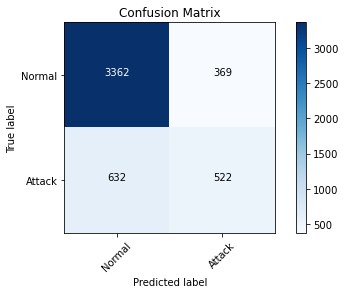

KNeighborsClassifier:
Normal Precision: 0.8195742471443406
Attack Precision: 0.4443368828654405
Normal Recall: 0.8461538461538461
Attack Recall: 0.39774696707105717
Normal F1: 0.8326519847026242
Attack F1: 0.41975308641975306
Error 0.2597748208802456
Accuracy 0.7402251791197544
FP rate: 0.15384615384615385
FN rate: 0.6022530329289428


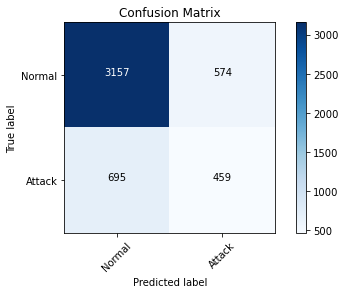

LinearSVC:
Normal Precision: 0.8379234706312454
Attack Precision: 0.6253196930946292
Normal Recall: 0.9214687751273117
Attack Recall: 0.4237435008665511
Normal F1: 0.8777125351033954
Attack F1: 0.5051652892561983
Error 0.19611054247697035
Accuracy 0.8038894575230296
FP rate: 0.0785312248726883
FN rate: 0.5762564991334489


C:\Users\hewj\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


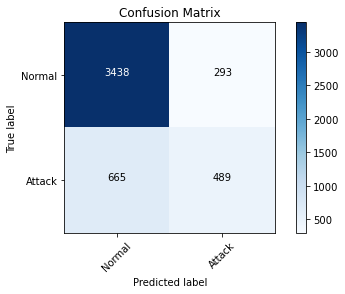

DecisionTreeClassifier:
Normal Precision: 0.8379234706312454
Attack Precision: 0.6253196930946292
Normal Recall: 0.9214687751273117
Attack Recall: 0.4237435008665511
Normal F1: 0.8777125351033954
Attack F1: 0.5051652892561983
Error 0.19611054247697035
Accuracy 0.8038894575230296
FP rate: 0.0785312248726883
FN rate: 0.5762564991334489


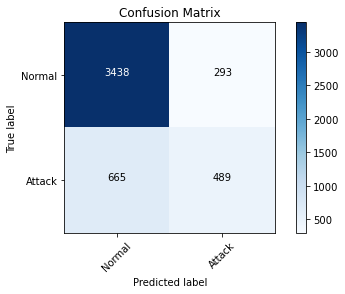

AdaBoostClassifier:
Normal Precision: 0.8379234706312454
Attack Precision: 0.6253196930946292
Normal Recall: 0.9214687751273117
Attack Recall: 0.4237435008665511
Normal F1: 0.8777125351033954
Attack F1: 0.5051652892561983
Error 0.19611054247697035
Accuracy 0.8038894575230296
FP rate: 0.0785312248726883
FN rate: 0.5762564991334489


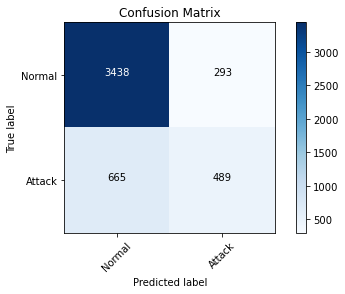

GaussianNB:
Normal Precision: 0.9348958333333334
Attack Precision: 0.3889965129794653
Normal Recall: 0.5773251139104798
Attack Recall: 0.8700173310225303
Normal F1: 0.7138359569179785
Attack F1: 0.5376171352074967
Error 0.35353121801432963
Accuracy 0.6464687819856704
FP rate: 0.42267488608952025
FN rate: 0.12998266897746968


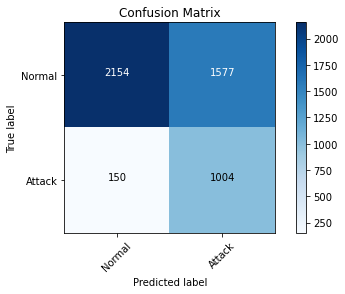

RandomForestClassifier:
Normal Precision: 0.8379234706312454
Attack Precision: 0.6253196930946292
Normal Recall: 0.9214687751273117
Attack Recall: 0.4237435008665511
Normal F1: 0.8777125351033954
Attack F1: 0.5051652892561983
Error 0.19611054247697035
Accuracy 0.8038894575230296
FP rate: 0.0785312248726883
FN rate: 0.5762564991334489


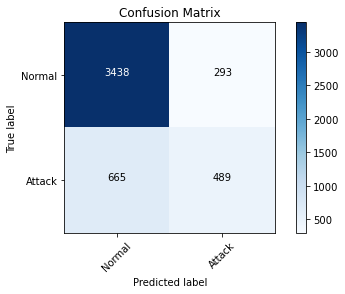

feature importance:
('account-age', 0.5052338237065849)
('active-session_No', 0.2683410477841584)
('active-session_Yes', 0.22642512850925683)
*Note on evaluation metric: Error = 1 - Accuracy = 1 - (# correct classifications)/(# total classifications)


In [7]:
# feel free to change the classifiers here
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    LinearSVC(),
    DecisionTreeClassifier(max_depth=5),
    AdaBoostClassifier(),
    GaussianNB(),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
]

run_classification(X, y, classifiers, X.columns)

**TASK:** Be prepared to explain to the group what modeling approach you used, variables you included in your model, as well as how you pre-processed them. Be prepared to report some notion of your model's accuracy.

# Section 2 - Fairness

Now that you've gotten a sense of how models are built, let's look at fairness. 

**TASK:** Take the model(s) you've built and try computing different notions of their performance (accuracy, false positive rate, false negative rate, outcomes) for different sub-populations, referring to the demographic variables. What do you find?

In [8]:
def run_classification_on_subsets(X, y, classifiers, feature_names, subset_on="sex"): 
    model_error = [0] * len(classifiers)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Evaluate classifiers. 
    for classifier in classifiers:
        for subset in data[subset_on].unique():
            print("==================================")
            print(f"##### For {subset} #####")
            x_test_subset = x_test[x_test.index.isin(data[data[subset_on] == subset].index.values)]
            y_test_subset = y_test[y_test.index.isin(data[data[subset_on] == subset].index.values)]
            classify(classifier, x_train, x_test_subset, y_train, y_test_subset, feature_names)
    
    print("*Note on evaluation metric: Error = 1 - Accuracy = 1 - (# correct classifications)/(# total classifications)")

##### For  Male #####
LogisticRegression:
Normal Precision: 0.7820359281437126
Attack Precision: 0.6511387163561076
Normal Recall: 0.8857239742285521
Attack Recall: 0.46352247605011054
Normal F1: 0.8306567021784068
Attack F1: 0.5415411106328024
Error 0.24732930794240593
Accuracy 0.7526706920575941
FP rate: 0.11427602577144795
FN rate: 0.5364775239498895


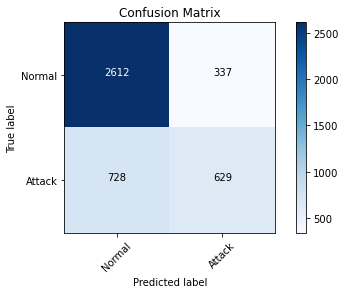

##### For  Female #####
LogisticRegression:
Normal Precision: 0.9256619144602851
Attack Precision: 0.3868312757201646
Normal Recall: 0.9242501270971022
Attack Recall: 0.39166666666666666
Normal F1: 0.9249554820656322
Attack F1: 0.3892339544513458
Error 0.13366560942455818
Accuracy 0.8663343905754418
FP rate: 0.07574987290289781
FN rate: 0.6083333333333333


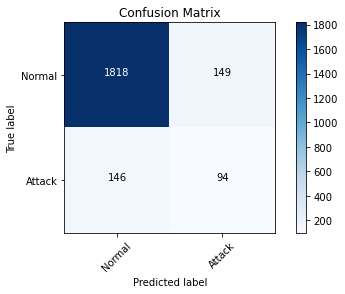

##### For  Male #####
KNeighborsClassifier:
Normal Precision: 0.7322515212981744
Attack Precision: 0.5064327485380117
Normal Recall: 0.8569006442861987
Attack Recall: 0.31908621960206335
Normal F1: 0.7896875
Attack F1: 0.391500904159132
Error 0.31258708778448674
Accuracy 0.6874129122155133
FP rate: 0.14309935571380128
FN rate: 0.6809137803979366


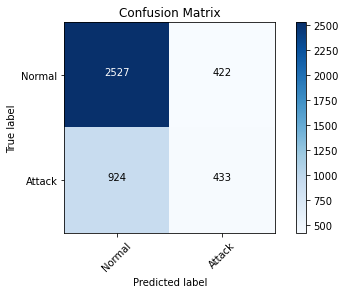

##### For  Female #####
KNeighborsClassifier:
Normal Precision: 0.9035827186512118
Attack Precision: 0.18446601941747573
Normal Recall: 0.8718861209964412
Attack Recall: 0.2375
Normal F1: 0.88745148771022
Attack F1: 0.20765027322404372
Error 0.19710013593112818
Accuracy 0.8028998640688718
FP rate: 0.12811387900355872
FN rate: 0.7625


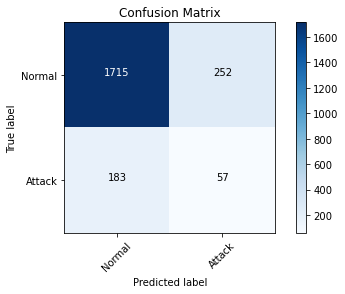

##### For  Male #####
LinearSVC:
Normal Precision: 0.7756819500870574
Attack Precision: 0.6790697674418604
Normal Recall: 0.9064089521871821
Attack Recall: 0.4303610906411201
Normal F1: 0.835965598123534
Attack F1: 0.5268380694632386
Error 0.24361356247097077
Accuracy 0.7563864375290292
FP rate: 0.0935910478128179
FN rate: 0.5696389093588798


C:\Users\hewj\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


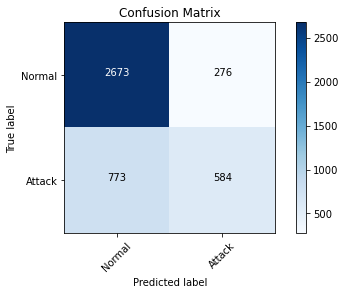

##### For  Female #####
LinearSVC:
Normal Precision: 0.9235732009925558
Attack Precision: 0.4479166666666667
Normal Recall: 0.9461108286731063
Attack Recall: 0.35833333333333334
Normal F1: 0.9347061778001003
Attack F1: 0.39814814814814814
Error 0.11780697779791571
Accuracy 0.8821930222020843
FP rate: 0.05388917132689375
FN rate: 0.6416666666666667


C:\Users\hewj\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


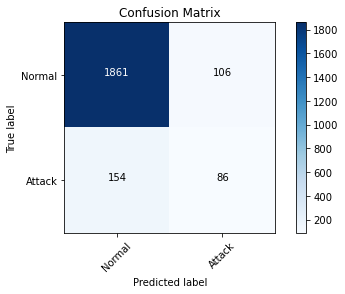

##### For  Male #####
DecisionTreeClassifier:
Normal Precision: 0.7756819500870574
Attack Precision: 0.6790697674418604
Normal Recall: 0.9064089521871821
Attack Recall: 0.4303610906411201
Normal F1: 0.835965598123534
Attack F1: 0.5268380694632386
Error 0.24361356247097077
Accuracy 0.7563864375290292
FP rate: 0.0935910478128179
FN rate: 0.5696389093588798


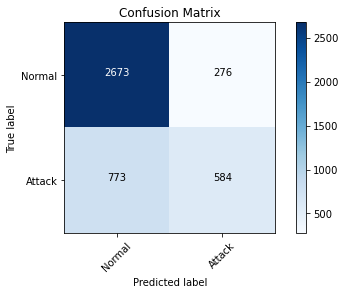

##### For  Female #####
DecisionTreeClassifier:
Normal Precision: 0.9235732009925558
Attack Precision: 0.4479166666666667
Normal Recall: 0.9461108286731063
Attack Recall: 0.35833333333333334
Normal F1: 0.9347061778001003
Attack F1: 0.39814814814814814
Error 0.11780697779791571
Accuracy 0.8821930222020843
FP rate: 0.05388917132689375
FN rate: 0.6416666666666667


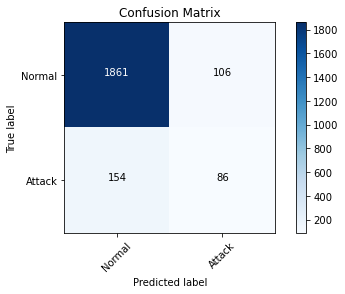

##### For  Male #####
AdaBoostClassifier:
Normal Precision: 0.7756819500870574
Attack Precision: 0.6790697674418604
Normal Recall: 0.9064089521871821
Attack Recall: 0.4303610906411201
Normal F1: 0.835965598123534
Attack F1: 0.5268380694632386
Error 0.24361356247097077
Accuracy 0.7563864375290292
FP rate: 0.0935910478128179
FN rate: 0.5696389093588798


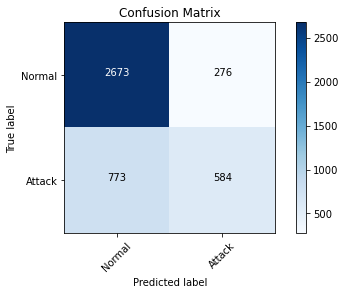

##### For  Female #####
AdaBoostClassifier:
Normal Precision: 0.9235732009925558
Attack Precision: 0.4479166666666667
Normal Recall: 0.9461108286731063
Attack Recall: 0.35833333333333334
Normal F1: 0.9347061778001003
Attack F1: 0.39814814814814814
Error 0.11780697779791571
Accuracy 0.8821930222020843
FP rate: 0.05388917132689375
FN rate: 0.6416666666666667


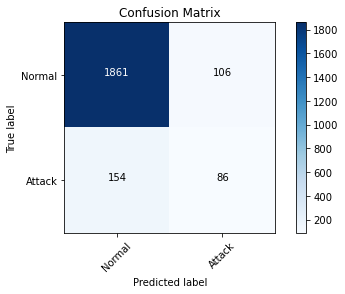

##### For  Male #####
GaussianNB:
Normal Precision: 0.9151921903599756
Attack Precision: 0.4566929133858268
Normal Recall: 0.508646998982706
Attack Recall: 0.8975681650700074
Normal F1: 0.6538796861377506
Attack F1: 0.6053677932405567
Error 0.36878773803994425
Accuracy 0.6312122619600558
FP rate: 0.491353001017294
FN rate: 0.10243183492999262


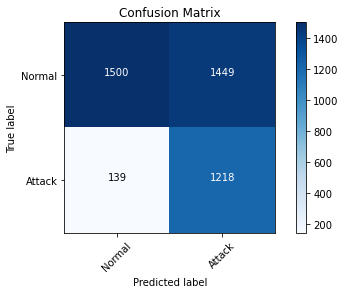

##### For  Female #####
GaussianNB:
Normal Precision: 0.9574769666902906
Attack Precision: 0.22613065326633167
Normal Recall: 0.6868327402135231
Attack Recall: 0.75
Normal F1: 0.7998815867377146
Attack F1: 0.3474903474903475
Error 0.30629814227458085
Accuracy 0.6937018577254191
FP rate: 0.31316725978647686
FN rate: 0.25


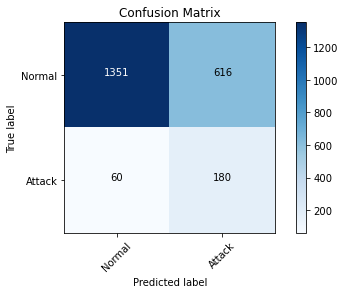

##### For  Male #####
RandomForestClassifier:
Normal Precision: 0.7756819500870574
Attack Precision: 0.6790697674418604
Normal Recall: 0.9064089521871821
Attack Recall: 0.4303610906411201
Normal F1: 0.835965598123534
Attack F1: 0.5268380694632386
Error 0.24361356247097077
Accuracy 0.7563864375290292
FP rate: 0.0935910478128179
FN rate: 0.5696389093588798


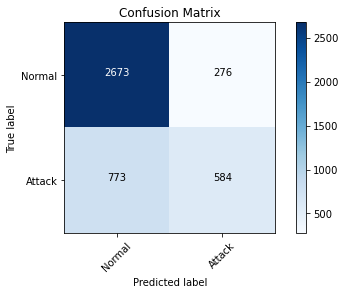

feature importance:
('account-age', 0.5038791300570938)
('active-session_Yes', 0.26318187562221607)
('active-session_No', 0.2329389943206901)
##### For  Female #####
RandomForestClassifier:
Normal Precision: 0.9246882793017457
Attack Precision: 0.4405940594059406
Normal Recall: 0.9425521098118963
Attack Recall: 0.37083333333333335
Normal F1: 0.9335347432024169
Attack F1: 0.4027149321266969
Error 0.11961939284096057
Accuracy 0.8803806071590394
FP rate: 0.057447890188103715
FN rate: 0.6291666666666667


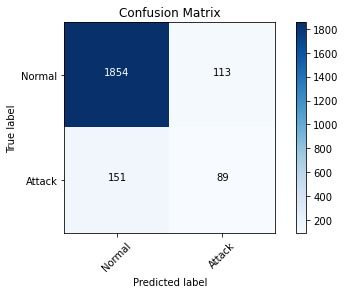

feature importance:
('account-age', 0.5130827106688788)
('active-session_No', 0.28019322782746753)
('active-session_Yes', 0.2067240615036537)
*Note on evaluation metric: Error = 1 - Accuracy = 1 - (# correct classifications)/(# total classifications)


In [9]:
# modify the code below to change which demographics you would like to subset
subset_on = "sex"
run_classification_on_subsets(X, y, classifiers=classifiers, feature_names=X.columns, subset_on=subset_on)

# Section 3 - Explainability

Finally, think about how you will explain your model. What do you need to communicate? Google has a page about the [model cards approach](https://modelcards.withgoogle.com/about), including some [examples](https://modelcards.withgoogle.com/model-reports). You won't have nearly enough time to create a full version of a model card or anything similar, but be prepared for the following tasks:

**TASK:** Prepare a short explanation *for your boss* about what the model does and why you are confident in deploying it. Think about the many aspects about which you might want to be confident about deploying this model. Describe for your boss how the model works, what the model does, and why they should trust you.

**TASK:** Prepare a short explaination *for your customers* who are going to be trying to log into your service and whose login attempt will be classified by the model.